In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_dir = os.path.join('../input/mechanical-tools-dataset/train_data_V2/train_data_V2')
validation_dir = os.path.join('../input/mechanical-tools-dataset/validation_data_V2/validation_data_V2')

train_screwdriver = os.path.join('../input/mechanical-tools-dataset/train_data_V2/train_data_V2/screwdriver')
train_wrench = os.path.join('../input/mechanical-tools-dataset/train_data_V2/train_data_V2/wrench')

valid_screwdriver = os.path.join('../input/mechanical-tools-dataset/validation_data_V2/validation_data_V2/screwdriver')
valid_wrench = os.path.join('../input/mechanical-tools-dataset/validation_data_V2/validation_data_V2/wrench')

In [4]:
print('total training screwdriver image :' ,len(os.listdir(train_screwdriver)))
print('total training wrench image :' ,len(os.listdir(train_wrench)))
print('total validation screwdriver image :' ,len(os.listdir(valid_screwdriver)))
print('total validation wrench image :' ,len(os.listdir(valid_wrench)))

total training screwdriver image : 800
total training wrench image : 800
total validation screwdriver image : 400
total validation wrench image : 400


In [5]:
import tensorflow
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [8]:
local_weights_file = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (300,300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 17, 17, 768)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=30,
                                                    class_mode='categorical',
                                                    target_size=(300,300))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=30,
                                                         class_mode  = 'categorical',
                                                         target_size = (300,300))

Found 2400 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
x = layers.Flatten()(last_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [16]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 30,
                    epochs = 40,
                    validation_steps = 10,
                    verbose = 2
                   )

Epoch 1/40
30/30 - 33s - loss: 7.0309 - accuracy: 0.3944 - val_loss: 0.9237 - val_accuracy: 0.4900
Epoch 2/40
30/30 - 25s - loss: 0.9976 - accuracy: 0.4889 - val_loss: 0.8135 - val_accuracy: 0.5967
Epoch 3/40
30/30 - 25s - loss: 0.8893 - accuracy: 0.5989 - val_loss: 0.7512 - val_accuracy: 0.7667
Epoch 4/40
30/30 - 24s - loss: 0.7913 - accuracy: 0.6344 - val_loss: 0.6214 - val_accuracy: 0.8000
Epoch 5/40
30/30 - 24s - loss: 0.8189 - accuracy: 0.6500 - val_loss: 0.5083 - val_accuracy: 0.8267
Epoch 6/40
30/30 - 24s - loss: 0.7246 - accuracy: 0.6667 - val_loss: 0.5248 - val_accuracy: 0.8600
Epoch 7/40
30/30 - 24s - loss: 0.7021 - accuracy: 0.7022 - val_loss: 0.5564 - val_accuracy: 0.8033
Epoch 8/40
30/30 - 24s - loss: 0.6775 - accuracy: 0.7133 - val_loss: 0.4508 - val_accuracy: 0.8567
Epoch 9/40
30/30 - 24s - loss: 0.6846 - accuracy: 0.7133 - val_loss: 0.4575 - val_accuracy: 0.8133
Epoch 10/40
30/30 - 23s - loss: 0.6990 - accuracy: 0.6800 - val_loss: 0.4475 - val_accuracy: 0.8467
Epoch 11/

Text(0.5, 1.0, 'Training and validation loss')

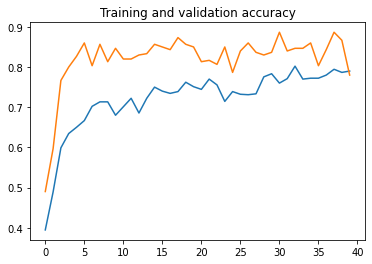

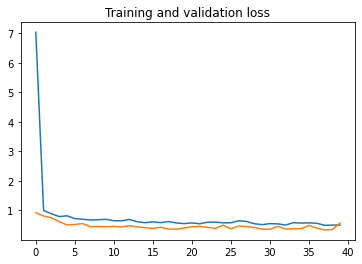

In [18]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'  )
